Malaria Disease Detection using Convolutional Neural Network

Introduction:
Malaria, a life-threatening disease caused by Plasmodium parasites, spreads to people through the bites of some infected female Anopheles mosquitoes. This project focuses on the development of a deep learning model for the classification of malaria parasitized and uninfected cell images. 

Objective:
The goal of this project is to create a CNN model capable of distinguishing between two key classes:

Parasitized Cells: Red blood cells infected with Plasmodium parasites.
Uninfected Cells: Healthy red blood cells without malaria infection.

Significance :
Automated malaria cell classification has the potential to speed up the diagnostic process, especially in regions with limited access to healthcare resources. The successful implementation of this model could contribute to more efficient and accurate malaria diagnosis, aiding healthcare professionals in providing timely and targeted interventions.

In [21]:
# import necessary libraries
import os
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.models import load_model 
import warnings
warnings.filterwarnings('ignore')

In [22]:
#List the contents inside the directories
data=r'data'
test=r'test'
print(os.listdir(data))
print(os.listdir(test))

['Parasitized', 'Uninfected']
['Parasitized', 'Uninfected']


(124, 115, 3)


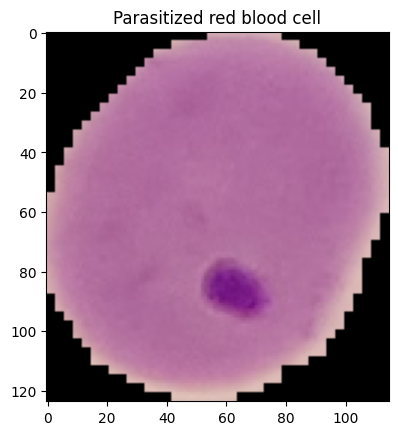

In [23]:
# Display the image of sample cells and its shape.
img=imread(r'D:\DL Projects\blood_samples\data\Parasitized\C59P20thinF_IMG_20150803_115303_cell_43.png')
plt.title('Parasitized red blood cell')
print(img.shape)
plt.imshow(img)

(133, 118, 3)


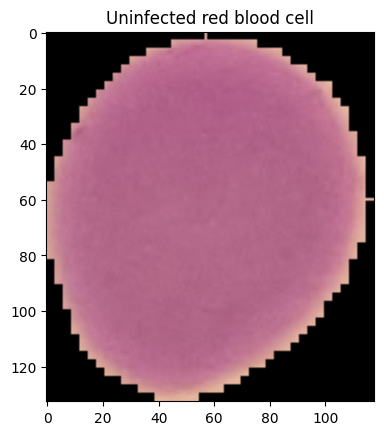

In [24]:
img1=imread(r'D:\DL Projects\blood_samples\data\Uninfected\C59P20thinF_IMG_20150803_111333_cell_120.png')
plt.title('Uninfected red blood cell')
print(img1.shape)
plt.imshow(img1)

In [25]:
number_of_classes=len(os.listdir(data))
print(number_of_classes)

2


In [26]:
# Data loading and augmentation
train_gen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_gen=ImageDataGenerator(
    rescale=1./255)

train_data=train_gen.flow_from_directory(data,target_size=(100,100),class_mode='categorical')
test_data=test_gen.flow_from_directory(test,target_size=(100,100),class_mode='categorical')

Found 23554 images belonging to 2 classes.
Found 4004 images belonging to 2 classes.


Text(0, 0.5, 'Number of images per class')

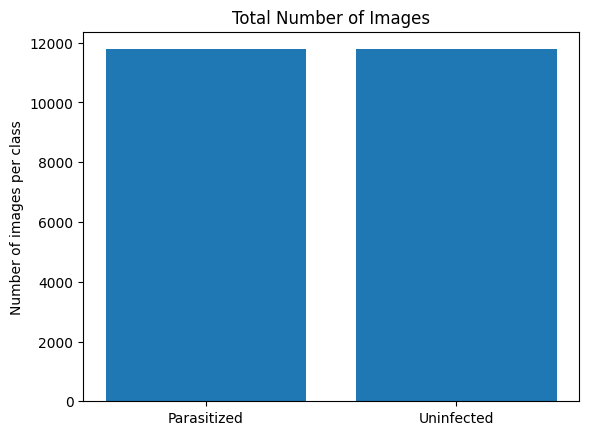

In [27]:
# Visualizing the count of each classes
plt.bar(range(number_of_classes),[len(os.listdir(os.path.join(data,class_dir))) for class_dir in os.listdir(data)])
plt.title('Total Number of Images')
number_of_classes=len(train_data.class_indices)
plt.xticks(range(number_of_classes),train_data.class_indices.keys())
plt.ylabel('Number of images per class')

In [28]:
# To build the CNN model 
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),input_shape=(100,100,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     3,385,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,405,294 (12.99 MB)

 Trainable params: 3,405,294 (12.99 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_data,validation_data=test_data,epochs=15)


Epoch 1/15
737/737 ━━━━━━━━━━━━━━━━━━━━ 1142s 2s/step - accuracy: 0.6754 - loss: 0.6130 - val_accuracy: 0.8751 - val_loss: 0.3118
Epoch 2/15
737/737 ━━━━━━━━━━━━━━━━━━━━ 507s 684ms/step - accuracy: 0.8939 - loss: 0.2962 - val_accuracy: 0.8619 - val_loss: 0.3114
Epoch 3/15
737/737 ━━━━━━━━━━━━━━━━━━━━ 536s 721ms/step - accuracy: 0.9054 - loss: 0.2635 - val_accuracy: 0.8826 - val_loss: 0.2887
Epoch 4/15
737/737 ━━━━━━━━━━━━━━━━━━━━ 552s 744ms/step - accuracy: 0.9202 - loss: 0.2377 - val_accuracy: 0.8851 - val_loss: 0.2574
Epoch 5/15
737/737 ━━━━━━━━━━━━━━━━━━━━ 568s 766ms/step - accuracy: 0.9196 - loss: 0.2319 - val_accuracy: 0.8809 - val_loss: 0.2990
Epoch 6/15
737/737 ━━━━━━━━━━━━━━━━━━━━ 563s 756ms/step - accuracy: 0.9260 - loss: 0.2218 - val_accuracy: 0.9058 - val_loss: 0.2561
Epoch 7/15
737/737 ━━━━━━━━━━━━━━━━━━━━ 590s 795ms/step - accuracy: 0.9269 - loss: 0.2188 - val_accuracy: 0.9093 - val_loss: 0.2709
Epoch 8/15
737/737 ━━━━━━━━━━━━━━━━━━━━ 623s 839ms/step - accuracy: 0.9252 - l

In [30]:
# Save the model 
model.save('malaria_cells.h5')

In [31]:
# Load the model 
model=load_model('malaria_cells.h5')

(100, 100, 3)


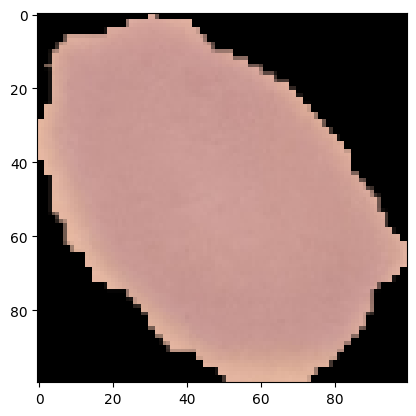

In [32]:
# Prediction of a new image using pre-trained model
image=imread(r'D:\DL Projects\cell_images\images\sample4.png')
image=resize(image,(100,100,3))
print(image.shape)
plt.imshow(image)

In [33]:
image=image.reshape(1,100,100,3)
print(image.shape)

(1, 100, 100, 3)


In [34]:
y_new=model.predict(image)
y_new

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


array([[0.00587029, 0.9941298 ]], dtype=float32)

In [35]:
classes=os.listdir(data)
print(classes)

['Parasitized', 'Uninfected']


In [36]:
y_pred=y_new.argmax(axis=1)
y_pred

array([1], dtype=int64)

In [37]:
result=classes[y_pred.item()]
print(result)

Uninfected
